In [6]:
import cv2
import sys
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

import wikipedia
import requests
import json


In [2]:
def get_wiki_image(search_term):
    WIKI_REQUEST = 'http://en.wikipedia.org/w/api.php?action=query&prop=pageimages&format=json&piprop=original&titles='
    try:
        result = wikipedia.search(search_term, results = 1)
        wikipedia.set_lang('en')
        wkpage = wikipedia.WikipediaPage(title = result[0])
        title = wkpage.title
        response  = requests.get(WIKI_REQUEST+title)
        json_data = json.loads(response.text)
        img_link = list(json_data['query']['pages'].values())[0]['original']['source']
        return img_link        
    except:
        return 0

In [3]:
player1 = "Yanick Noah"

In [3]:
def load_image_from_url_with_opencv(img_url):
    try:
        response = requests.get(img_url)
        arr = np.asarray(bytearray(response.content), dtype=np.uint8)
        img = cv2.imdecode(arr, -1)  # 'Load it as it is'
        return img
    except Exception as e:
        print(f"Error: {e}")
        return None

img_url = get_wiki_image(player1+" Tennis player")
if img_url != 0:
    image = load_image_from_url_with_opencv(img_url)
    if image is not None:
        cv2.imshow('Image', image)  # This will open the image
        cv2.waitKey(0)  # Wait for a key press to close the image window
        cv2.destroyAllWindows()
    else:
        print("Could not load image")
else:
    print("No image found")

NameError: name 'player1' is not defined

In [5]:
wiki_image = get_wiki_image((player1+" tennis player"))

In [6]:
# Load the image
#image = cv2.imread('Tsonga.jpg')
#image = cv2.imread('Djoko1.jpg')
#image = cv2.imread('Federer.png')
#image = cv2.imread('group.jpg')
#image = cv2.imread('class.jpg')
image = wiki_image

In [7]:
# Convert the image to grayscale
if len(image.shape) > 2 and image.shape[2] == 3:  # If the image is colored (BGR)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
else:
    gray = image  # The image is already grayscale

# Load the pre-trained face detector
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Detect faces in the image
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.20, minNeighbors=10, minSize=(30, 30))

# Crop a larger area around each face with a percentage margin
expanded_faces = []
margin_percentage = 0.25  # Adjust the percentage as desired

for (x, y, w, h) in faces:
    # Calculate the margin based on face size
    margin_x = int(w * margin_percentage)
    margin_y = int(h * margin_percentage)
    
    # Calculate the expanded coordinates
    x_expanded = max(0, x - margin_x)
    y_expanded = max(0, y - margin_y)
    w_expanded = min(image.shape[1] - 1, w + 2 * margin_x)
    h_expanded = min(image.shape[0] - 1, h + 2 * margin_y)
    
    # Crop the expanded area
    cropped_image = image[y_expanded:y_expanded + h_expanded, x_expanded:x_expanded + w_expanded]
    expanded_faces.append(cropped_image)

# Display the cropped images
# for cropped_image in expanded_faces:
#     plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
#     plt.axis('off')
#     plt.show()

AttributeError: 'str' object has no attribute 'shape'

In [8]:
def resize_image(image, size=(500, 500)):  # Set to desired output resolution
    return cv2.resize(image, size)

def mask_to_circle_with_border(image, border_size=10, border_color=[175, 175, 175, 256]):
    # Create a circular mask with the same size as the image
    mask = np.zeros(image.shape[:2], dtype=np.uint8)
    cv2.circle(mask, (image.shape[1]//2, image.shape[0]//2), min(image.shape[:2])//2, 1, -1)

    # Apply the mask to keep only the part of the image inside the circle
    masked_image = cv2.bitwise_and(image, image, mask=mask)
    masked_image[mask==0] = [0, 0, 0, 0]

    # Add a border
    bordered_image = cv2.copyMakeBorder(
        masked_image,
        top=border_size,
        bottom=border_size,
        left=border_size,
        right=border_size,
        borderType=cv2.BORDER_CONSTANT,
        value=[0, 0, 0, 0]  # Transparent border
    )
    cv2.circle(bordered_image, (bordered_image.shape[1]//2, bordered_image.shape[0]//2), min(bordered_image.shape[:2])//2-border_size, border_color, border_size)

    bordered_image = bordered_image.astype(np.uint8)  # Ensure data type is uint8

    return bordered_image

# Make sure your images are in square form and have 4 channels (RGBA), not 3 (RGB)
expanded_faces_rgba = [cv2.cvtColor(img, cv2.COLOR_BGR2RGBA) for img in expanded_faces]

# Resize and convert images
expanded_faces_resized_rgba = [cv2.cvtColor(resize_image(img), cv2.COLOR_BGR2RGBA) for img in expanded_faces]

# Process with mask_to_circle_with_border()
circular_images = [mask_to_circle_with_border(img) for img in expanded_faces_resized_rgba]

# Display images one by one
for img in circular_images:
    plt.imshow(img)
    plt.axis('off')
    plt.show()

NameError: name 'expanded_faces' is not defined

In [5]:
import random
people_list = [
  "Napoleon Bonaparte",
  "Donald Trump",
  "Albert Einstein",
  "Oprah Winfrey",
  "Leonardo da Vinci",
  "Amelia Earhart",
  "Marie Curie",
  "Nelson Mandela",
  "Jane Austen",
  "Walt Disney",
  "Martin Luther King Jr.",
  "Coco Chanel",
  "Mahatma Gandhi",
  "Queen Elizabeth II",
  "Steve Jobs",
  "Marilyn Monroe",
  "Muhammad Ali",
  "Frida Kahlo",
  "Bill Gates",
  "Cristiano Ronaldo",
  "Serena Williams",
  "Elvis Presley",
  "J.K. Rowling",
  "Vincent van Gogh",
  "Pablo Picasso",
  "Aristotle",
  "Winston Churchill",
  "Emily Dickinson",
  "Neil Armstrong",
  "Rosa Parks",
  "Elon Musk",
  "Malala Yousafzai",
  "Fidel Castro",
  "John F. Kennedy",
  "Mother Teresa",
  "Michael Jackson",
  "Stephen Hawking",
  "Michelle Obama",
  "Sigmund Freud",
  "Charles Darwin",
  "Fyodor Dostoevsky",
  "Bob Marley",
  "Catherine the Great",
  "Bruce Lee",
  "Audrey Hepburn",
  "Jimi Hendrix",
  "Marie Antoinette",
  "Pele",
  "Princess Diana",
  "Lionel Messi",
  "Ada Lovelace"
]

In [175]:
people_dict = {
    "Albert Einstein": "Known for their contributions to the theory of relativity and the equation E=mc².",
    "Alan Turing": "Recognized as a pioneer in the field of computer science and for cracking the Enigma code during World War II.",
    "Rosalind Franklin": "Renowned for their groundbreaking discoveries in the field of genetics and the co-discovery of the structure of DNA.",
    "Martin Luther King Jr.": "Remembered as an influential leader of the civil rights movement and for his famous 'I Have a Dream' speech.",
    "Leonardo da Vinci": "Celebrated for their extraordinary talent as a painter and for creating the iconic masterpiece, the Mona Lisa.",
    "Charles Darwin": "Known for their pivotal role in the development of the theory of evolution by natural selection.",
    "Isaac Newton": "Renowned for their contributions to physics and for formulating the three laws of motion.",
    "Sigmund Freud": "Recognized as a prominent figure in the field of psychology and for establishing the theory of psychoanalysis.",
    "Rosa Parks": "Remembered as an influential figure in the field of civil rights activism and for refusing to give up her seat on a bus.",
    "Michael Phelps": "Celebrated for their extraordinary achievements as an Olympic gold medalist and for breaking numerous records in swimming.",
    "William Shakespeare": "Known for their notable contributions to literature and for authoring renowned works, including a famous play set in Denmark.",
    "Ludwig van Beethoven": "Renowned for their extraordinary musical talent as a composer and for composing the famous Ninth Symphony.",
    "Friedrich Nietzsche": "Recognized as an influential figure in the field of philosophy and for developing the concept of the Übermensch.",
    "Steve Jobs": "Remembered as a trailblazing entrepreneur and for founding one of the largest technology companies in the world.",
    "Jonas Salk": "Celebrated for their exceptional achievements in the field of medicine and for developing a vaccine to prevent polio.",
    "Vincent van Gogh": "Known for their remarkable contributions to the world of art and for creating the iconic artwork, The Starry Night.",
    "Albert Einstein": "Renowned for their groundbreaking work in the field of physics and for developing the theory of general relativity.",
    "Jean-Paul Sartre": "Recognized as an influential figure in the field of philosophy and for establishing the concept of existentialism.",
    "Nelson Mandela": "Remembered as a prominent leader in the fight against apartheid and for becoming the first black President of South Africa.",
    "Albert Einstein": "Celebrated for their exceptional achievements in the field of mathematics and for formulating the theory of relativity."
}


In [180]:
people_list = list(people_dict.keys())

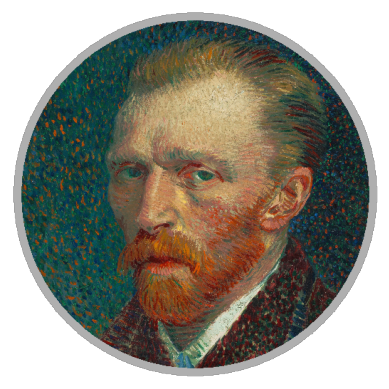

Known for their remarkable contributions to the world of art and for creating the iconic artwork, The Starry Night.


In [185]:
import cv2
import numpy as np
import requests
import wikipedia

headers = {'User-Agent': 'TennisPlayerAppBot (https://github.com/Tcha182; corentin.detilly@gmail.com)'}
WIKI_REQUEST = 'http://en.wikipedia.org/w/api.php?action=query&prop=pageimages&format=json&piprop=original&titles='
FACE_DETECTOR_PATH = cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'
MARGIN_PERCENTAGE = 0.25

def get_wiki_image(search_term, headers=headers):
    """Fetches the image URL for a given search term from Wikipedia."""
    try:
        result = wikipedia.search(search_term, results=1)
        wikipedia.set_lang('en')
        wkpage = wikipedia.WikipediaPage(title=result[0])
        title = wkpage.title
        response = requests.get(WIKI_REQUEST+title, headers=headers)
        response.raise_for_status()
        json_data = response.json()
        img_link = list(json_data['query']['pages'].values())[0]['original']['source']
        return img_link
    except requests.exceptions.HTTPError as http_err:
        print(f"HTTP error occurred: {http_err}")
    except Exception as err:
        print(f"An error occurred: {err}")
    return None

def load_image_from_url_with_opencv(img_url, headers=headers):
    """Loads an image from a URL using OpenCV."""
    try:
        response = requests.get(img_url, headers=headers)
        response.raise_for_status()
        arr = np.asarray(bytearray(response.content), dtype=np.uint8)
        img = cv2.imdecode(arr, -1)
        return img
    except Exception as e:
        print(f"Error: {e}")
    return None

def detect_faces(image):
    """Detects faces in an image using OpenCV."""
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) if len(image.shape) > 2 and image.shape[2] == 3 else image
    face_cascade = cv2.CascadeClassifier(FACE_DETECTOR_PATH)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.12, minNeighbors=6, minSize=(30, 30))
    return faces


def detect_faces_dnn(image):
    """Detects faces in an image using a Deep Learning model."""
    
    # Ensure the image has 3 channels
    if len(image.shape) == 2: # grayscale image
        image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
    elif image.shape[2] == 4: # rgba image
        image = cv2.cvtColor(image, cv2.COLOR_RGBA2RGB)

    net = cv2.dnn.readNetFromCaffe('deploy.prototxt', 'res10_300x300_ssd_iter_140000_fp16.caffemodel')
    blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 1.0, (300, 300), (104.0, 177.0, 123.0))
    net.setInput(blob)
    detections = net.forward()
    
    # Iterate over the detections and find the detection with the maximum confidence
    max_confidence_index = np.argmax(detections[0, 0, :, 2])
    if detections[0, 0, max_confidence_index, 2] > 0.5:  # <-- Adjustable confidence threshold
        box = detections[0, 0, max_confidence_index, 3:7] * np.array([image.shape[1], image.shape[0], image.shape[1], image.shape[0]])
        (startX, startY, endX, endY) = box.astype("int")
        return [(startX, startY, endX - startX, endY - startY)]  # Returns a list of one face
    else:
        return []  # Returns an empty list if no faces with confidence above the threshold are found

def expand_faces(image, faces, margin_percentage=0.25):
    """Expands the detected face regions."""
    expanded_faces = []
    for (x, y, w, h) in faces:
        # Calculate margin
        margin = int(max(w, h) * margin_percentage)

        # Make the box square
        d = abs(w - h) // 2
        if w > h:
            y = max(0, y - d)
            h = w
        else:
            x = max(0, x - d)
            w = h

        # Calculate margin again based on square face dimensions
        margin = int(max(w, h) * margin_percentage)

        # Expand the coordinates
        x_expanded = max(0, x - margin)
        y_expanded = max(0, y - margin)
        w_expanded = min(image.shape[1] - x_expanded, w + 2 * margin)
        h_expanded = min(image.shape[0] - y_expanded, h + 2 * margin)

        # Crop the expanded area
        cropped_image = image[y_expanded:y_expanded + h_expanded, x_expanded:x_expanded + w_expanded]
        expanded_faces.append(cropped_image)
    return expanded_faces

def process_images(expanded_faces):
    """Resizes, converts, and processes the expanded face images."""
    expanded_faces_rgba = [cv2.cvtColor(img, cv2.COLOR_BGR2RGBA) for img in expanded_faces]
    expanded_faces_resized_rgba = [resize_image(img) for img in expanded_faces_rgba]
    circular_images = [mask_to_circle_with_border(img) for img in expanded_faces_resized_rgba]
    return circular_images

def resize_image(image, size=(500, 500)):
    """Resizes an image to the specified size."""
    return cv2.resize(image, size)

def mask_to_circle_with_border(image, border_size=10, border_color=[175, 175, 175, 256]):
    """Converts an image to a circular shape with a border."""
    mask = np.zeros(image.shape[:2], dtype=np.uint8)
    cv2.circle(mask, (image.shape[1]//2, image.shape[0]//2), min(image.shape[:2])//2, 1, -1)
    masked_image = cv2.bitwise_and(image, image, mask=mask)
    masked_image[mask==0] = [0, 0, 0, 0]
    bordered_image = cv2.copyMakeBorder(
        masked_image,
        top=border_size,
        bottom=border_size,
        left=border_size,
        right=border_size,
        borderType=cv2.BORDER_CONSTANT,
        value=[0, 0, 0, 0]
    )
    cv2.circle(bordered_image, (bordered_image.shape[1]//2, bordered_image.shape[0]//2), min(bordered_image.shape[:2])//2-border_size, border_color, border_size)
    bordered_image = bordered_image.astype(np.uint8)
    return bordered_image

def display_images(images):
    """Displays the processed images."""
    for img in images:
        plt.imshow(img)
        plt.axis('off')
        plt.show()

if __name__ == "__main__":
    player = "Tsonga"
    player = random_value = random.choice(people_list)
    people_list.remove(player)
    #img_url = get_wiki_image(player + " Tennis player")
    img_url = get_wiki_image(player)
    if img_url is not None:
        image = load_image_from_url_with_opencv(img_url)
        if image is not None:
            #faces = detect_faces(image)
            faces = detect_faces_dnn(image)            
            expanded_faces = expand_faces(image, faces)
            circular_images = process_images(expanded_faces)
            display_images(circular_images)
            print(people_dict[player])
        else:
            print("Could not load image")
    else:
        print("No image found")

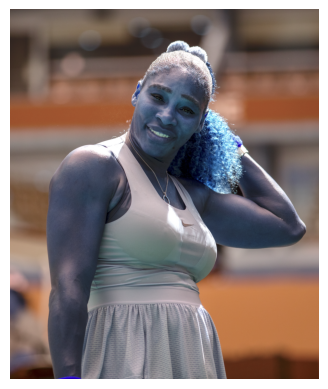

In [ ]:
plt.imshow(image)
plt.axis('off')
plt.show()